In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
DATA = '../data/'

In [8]:
from scipy.misc import imsave, fromimage, toimage
from PIL import Image, ImageOps

WIDTH = HEIGHT = 224
def load_and_crop_image(filename, target_size):
    return ImageOps.fit(Image.open(filename), target_size)

## Carga imágenes

In [15]:
gatos = np.array([fromimage(load_and_crop_image(DATA+'/gatos/cat.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])
perros = np.array([fromimage(load_and_crop_image(DATA+'/gatos/dog.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])

imágenes = np.concatenate((gatos, perros), axis=0)
labels = np.zeros(len(gatos) + len(perros), dtype=int)
labels[:len(gatos)] = 1

In [97]:
cat1 = imágenes[0]

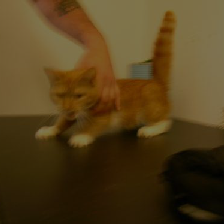

In [118]:
toimage(cat1 // 2)

In [101]:
cat1.shape

(224, 224, 3)

In [108]:
pixel1 = cat1[110,110]

In [109]:
pixel2 = cat1[125,125]

In [112]:
pixel1

array([142,  62,   0], dtype=uint8)

In [113]:
pixel2

array([149,  93,  16], dtype=uint8)

In [115]:
(pixel1.astype(float) + pixel2.astype(float))/2

array([ 145.5,   77.5,    8. ])

In [121]:
import numpy as np
np.max(cat1)
np.min(cat1)
np.mean(cat1)

116.64998538477892

## Dividirlas en grupos

In [13]:
características = np.load(DATA+'/feats/all_feats.npy')
indices1 = np.load(DATA+'/feats/indices1.npy')
indices2 = np.load(DATA+'/feats/indices2.npy')

In [ ]:
imágenes1 = imágenes[indices1]
car1 = características[indices1]
imágenes2 = imágenes[indices2]
car2 = características[indices2]

In [122]:
len(imágenes1)

10

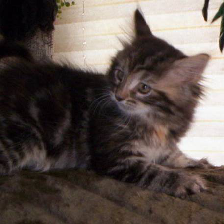

In [123]:
toimage(imágenes1[0])

In [132]:
características = car1[0]

In [127]:
par = np.array([-1, 0, 0])

In [131]:
par

array([-1,  0,  0])

In [130]:
X

array([  1.        ,   0.65449065,  85.2480203 ])

In [137]:
y = 0
for idx, cur_par in enumerate(par):
    x = características[idx] * cur_par
    y += x
y

-1.0

In [139]:
np.sum(par * características)

-1.0

In [140]:
np.dot(par, características)

-1.0

In [134]:
y

-1.0

In [43]:
import h5py

In [44]:
f = h5py.File('../data/vgg16_weights.h5')

In [22]:
import scipy.signal

In [65]:
K = np.array([[1, 0, -1]] * 3)

In [66]:
img2 = scipy.signal.convolve2d(imágenes[0][:,:,0], K)

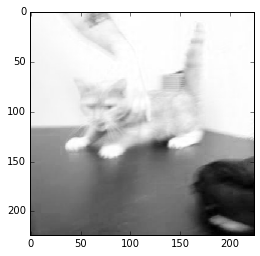

In [83]:
plt.imshow(imágenes[0][:,:,0], cmap=plt.cm.Greys_r)

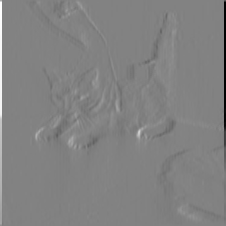

In [68]:
toimage(img2)

In [69]:
%run vgg16.py

Using TensorFlow backend.


Model loaded.


In [70]:
preds = model.predict(img_to_vgg_input(imagenes[0]))[0]

In [77]:
all_cats

[281, 282, 283, 284, 285, 286, 287]

In [78]:
synsets[281]

['n02123045', 'tabby, tabby cat']

In [79]:
preds[281]

0.00051682972116395831